In [1]:
!python -V
!pip install tensorflow==2.12.0

Python 3.10.11
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!nvidia-smi

Tue May 16 12:51:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [4]:
!git clone https://github.com/elw1s/MSNET.git
!cp -r "/content/MSNET/msnet/examples/msnet" .
!cp -r "/content/MSNET/demo" "msnet"
!mkdir "/content/MSNET/msnet/examples/msnet/data_dir"
!mkdir "/content/MSNET/msnet/examples/msnet/checkpoint_dir"

Cloning into 'MSNET'...
remote: Enumerating objects: 813, done.
remote: Counting objects: 100% (813/813), done.
remote: Compressing objects: 100% (704/704), done.
remote: Total 813 (delta 166), reused 675 (delta 82), pack-reused 0
Receiving objects: 100% (813/813), 16.28 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (166/166), done.


In [5]:
import requests
from tqdm import tqdm

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id , 'confirm': 1 }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in tqdm(response.iter_content(CHUNK_SIZE)):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [6]:
# Get dataset
DATASET_GDRIVE_ID = "1kEKJ8kr1aScXz_1El7Mn-Yi0ANducQIW"
DATASET_PATH = "/content/MSNET/msnet/examples/msnet/data_dir/data.zip"

# Get model files
MODEL_INDEX_GDRIVE_ID = "1G2JkD1BgYxWN40NsIvCOZiet4AEPbRBf"
MODEL_INDEX_PATH = "/content/MSNET/msnet/examples/msnet/checkpoint_dir/model-7400.index"

MODEL_WEIGHTS_GDRIVE_ID = "1MK8CNs_ZXhFhX6NYDSek4Y9NGHwMaOOb"
MODEL_WEIGHTS_PATH = "/content/MSNET/msnet/examples/msnet/checkpoint_dir/model-7400.data-00000-of-00001"

In [7]:
download_file_from_google_drive(MODEL_INDEX_GDRIVE_ID, MODEL_INDEX_PATH)
download_file_from_google_drive(MODEL_WEIGHTS_GDRIVE_ID, MODEL_WEIGHTS_PATH)
download_file_from_google_drive(DATASET_GDRIVE_ID, DATASET_PATH)

2it [00:00, 644.48it/s]
16278it [00:06, 2700.96it/s]
13665it [00:06, 2120.83it/s]


In [8]:
!sudo apt install python3.10


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.11-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [9]:
!unzip "/content/MSNET/msnet/examples/msnet/data_dir/data.zip" -d "/content/MSNET/msnet/examples/msnet/data_dir"

Archive:  /content/MSNET/msnet/examples/msnet/data_dir/data.zip
   creating: /content/MSNET/msnet/examples/msnet/data_dir/annotations/
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/annotations/instances_train.json  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/annotations/instances_val.json  
   creating: /content/MSNET/msnet/examples/msnet/data_dir/train/
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_0.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1080.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1170.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1260.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1350.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1440.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1530.jpg  
  inflating: /content/MSNET/msnet/examples/msnet/data_dir/train/10_1620.j

In [10]:
!cp -f /content/MSNET/env/coco.py /usr/local/lib/python3.10/dist-packages/pycocotools/coco.py
!cp -f /content/MSNET/env/cocoeval.py /usr/local/lib/python3.10/dist-packages/pycocotools/cocoeval.py

##Dependencies

In [11]:
!pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Cuda
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

!lspci | grep -i nvidia
### gcc compiler is required for development using the cuda toolkit. to verify the version of gcc install enter
!gcc --version
# system update
!sudo apt-get update
!sudo apt-get upgrade
# install other import packages
!sudo apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev
# first get the PPA repository driver
!sudo add-apt-repository ppa:graphics-drivers/ppa
!sudo apt update
# install nvidia driver with dependencies
!sudo apt install libnvidia-common-470
!sudo apt install libnvidia-gl-470
!sudo apt install nvidia-driver-470

 # installing CUDA-11.8

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!sudo mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda-repo-ubuntu2004-11-8-local_11.8.0-520.61.05-1_amd64.deb
!sudo dpkg -i cuda-repo-ubuntu2004-11-8-local_11.8.0-520.61.05-1_amd64.deb
!sudo cp /var/cuda-repo-ubuntu2004-11-8-local/cuda-*-keyring.gpg /usr/share/keyrings/
!sudo apt-get update
!sudo apt-get -y install cuda

# installing cudnn 8.6
!wget https://developer.nvidia.com/compute/cudnn/secure/8.6.0/local_installers/11.8/cudnn-local-repo-ubuntu2004-8.6.0.163_1.0-1_amd64.deb
!sudo dpkg -i cudnn-local-repo-ubuntu2004-8.6.0.163_1.0-1_amd64.deb
!sudo cp /var/cudnn-repo-ubuntu2004-8-6-local/cudnn-*-keyring.gpg /usr/share/keyrings/
!sudo apt-get update
!sudo apt-get -y install cuda


In [12]:
!nvidia-smi


Tue May 16 12:52:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
!nvcc -V


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [14]:
import pycocotools.mask as cocomask
import sys

org_paths = sys.path
sys.path[2] = '/usr/lib/python310.zip'
sys.path[3] = '/usr/lib/python3.10'
sys.path[4] = '/usr/lib/python3.10/lib-dynload'
sys.path[6] = '/usr/local/lib/python3.10/dist-packages'
sys.path[8] = '/usr/local/lib/python3.10/dist-packages/IPython/extensions'

In [15]:
!pip install tensorpack tensorrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16973 sha256=11347179bee8ac47f5b9f9a581b1b8d8ce56e6b0addf517e0eee7126f74dc950
  Stored in directory: /root/.cache/pip/wheels/6d/29/56/abdffd4c604f255b5254bef3f1c598ab7811ea020540599438
Successfully built tensorrt


In [16]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print(tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))
tf.test.gpu_device_name()

2.12.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


'/device:GPU:0'

In [ ]:
!python3.10 /content/MSNET/msnet/examples/msnet/train.py --config DATA.BASEDIR=/content/MSNET/msnet/examples/msnet/data_dir MODE_FPN=True \
  TRAIN.BASE_LR=1e-3 TRAIN.EVAL_PERIOD=1 TRAIN.LR_SCHEDULE=[3000]  \
  PREPROC.TRAIN_SHORT_EDGE_SIZE=[600,1200] TRAIN.CHECKPOINT_PERIOD=1 DATA.NUM_WORKERS=1 \
  --logdir /content/MSNET/msnet/examples/msnet/log_dir


2023-05-02 13:11:14.716537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[0502 13:11:16 @logger.py:92] Argv: /content/MSNET/msnet/examples/msnet/train.py --config DATA.BASEDIR=/content/MSNET/msnet/examples/msnet/data_dir MODE_FPN=True TRAIN.BASE_LR=1e-3 TRAIN.EVAL_PERIOD=1 TRAIN.LR_SCHEDULE=[3000] PREPROC.TRAIN_SHORT_EDGE_SIZE=[600,1200] TRAIN.CHECKPOINT_PERIOD=1 DATA.NUM_WORKERS=1 --logdir /content/MSNET/msnet/examples/msnet/log_dir
[0502 13:11:16 @train.py:55] Environment Information:
-----------------------  --------------------------------------------------------------------------------------
sys.platform             linux
Python                   3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Tensorpack               v0.11-0-gdb541e8e @/usr/local/lib/python3.10/dist-packages/tensorpack
Numpy                    1.22.4
TensorFlow               2.12.0/v2.12.0-rc1-12-g0db597d0d75 @/usr/local/lib/python3.10/dist-packages/tensorflow


In [18]:
!sudo apt-get install libtcmalloc-minimal4
!export LD_PRELOAD="/usr/lib/libtcmalloc_minimal.so.4"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtcmalloc-minimal4 is already the newest version (2.7-1ubuntu2).
libtcmalloc-minimal4 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


Populating the interactive namespace from numpy and matplotlib


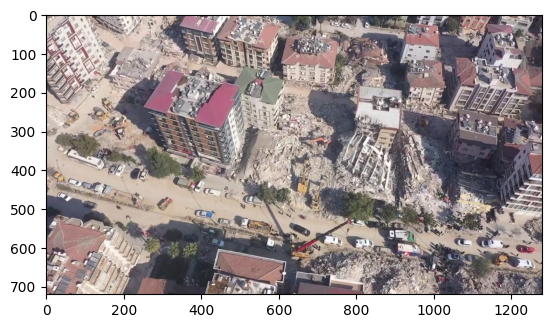

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/MSNET/msnet/examples/msnet/dataset/img/0056.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
!python3.10 "/content/MSNET/msnet/examples/msnet/predict.py" \
 --config MODE_FPN=True \
	--load "/content/MSNET/msnet/examples/msnet/checkpoint_dir/model-7400" --input-img "/content/MSNET/msnet/examples/msnet/dataset/img/"\
  --output-img "/content/MSNET/msnet/examples/msnet/dataset/img_pred/"

2023-05-16 12:59:33.186059: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[0516 12:59:35 @config.py:319] Config: ------------------------------------------
{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/path/to/your/DATA/DIR',
          'CLASS_NAMES': ['BG', '1', '2', '3'],
          'NUM_CATEGORY': 3,
          'NUM_WORKERS': 10,
          'TRAIN': ('train',),
          'VAL': ('val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
 

Populating the interactive namespace from numpy and matplotlib


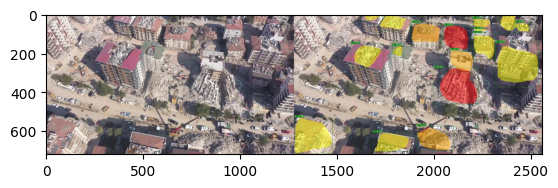

In [20]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/MSNET/msnet/examples/msnet/dataset/img_pred/0056.jpg')
imgplot = plt.imshow(img)
plt.show()